In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image as img


In [2]:
BRYGGE_SEKVENS = "./bilder/brygge_sekvens"
BRO_SEKVENS = "./bilder/bro_sekvens"
LAGRA_BILDER = ".bilder/lagra_bilete"
RESULT_FOLDER = BRYGGE_SEKVENS

In [3]:
K = np.loadtxt(f"{RESULT_FOLDER}/left/K_matrix.txt")
R = np.loadtxt(f"{RESULT_FOLDER}/left/R_matrix.txt")
T = np.loadtxt(f"{RESULT_FOLDER}/left/T_matrix.txt")

plt.ion()

# Under åpner vi ti = n'te bildet
left_images_filenames = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{RESULT_FOLDER}/left")))
timestamps = list(map(lambda fn: fn.split(".")[0], left_images_filenames))
ti = 0
timestamp = timestamps[ti]
left = cv2.imread(f"{RESULT_FOLDER}/left/{timestamp}.png")
right = cv2.imread(f"{RESULT_FOLDER}/right/{timestamp}.png")
disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)

print("Første:" ,timestamps[0], " Nærme: ", timestamps[len(timestamps)-1])



Første: 1689072599961543541  Nærme:  1689072633388130541


In [4]:
K_bro = np.loadtxt(f"{BRO_SEKVENS}/left/K_matrix.txt")
R_bro = np.loadtxt(f"{BRO_SEKVENS}/left/R_matrix.txt")
T_bro = np.loadtxt(f"{BRO_SEKVENS}/left/T_matrix.txt")

plt.ion()

# Under åpner vi ti = n'te bildet
left_images_filenames_bro = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{BRO_SEKVENS}/left")))
timestamps_bro = list(map(lambda fn: fn.split(".")[0], left_images_filenames_bro))
print("Bro første: ", timestamps_bro[0])

Bro første:  1689068851836122093


In [5]:
timestamp2 = timestamps[len(timestamps)-1]
print(timestamp2)
dispCloseUp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp2}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)

1689072633388130541


In [6]:
K_bro = np.loadtxt(f"{BRO_SEKVENS}/left/K_matrix.txt")
R_bro= np.loadtxt(f"{BRO_SEKVENS}/left/R_matrix.txt")
T_bro = np.loadtxt(f"{BRO_SEKVENS}/left/T_matrix.txt")

plt.ion()

# Under åpner vi ti = n'te bildet
left_images_filenames_bro = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{BRO_SEKVENS}/left")))
timestamps_bro = list(map(lambda fn: fn.split(".")[0], left_images_filenames_bro))
ti_bro = 0
timestampBro = timestamps_bro[ti_bro]
left_bro = cv2.imread(f"{BRO_SEKVENS}/left/{timestampBro}.png")
right_bro = cv2.imread(f"{BRO_SEKVENS}/right/{timestampBro}.png")
disp_bro = np.array(cv2.imread(f"{BRO_SEKVENS}/disp_zed/{timestampBro}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)

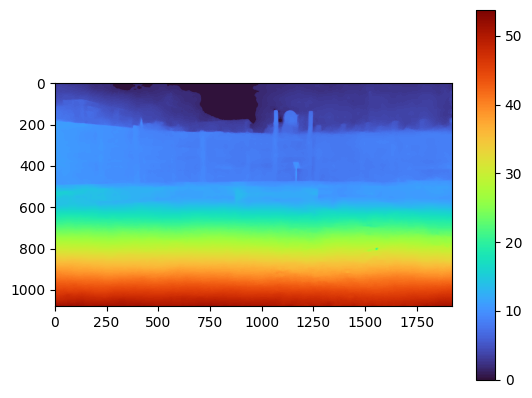

In [7]:
plt.imshow(disp, cmap="turbo")
plt.colorbar()
plt.show()
cv2.destroyAllWindows() 

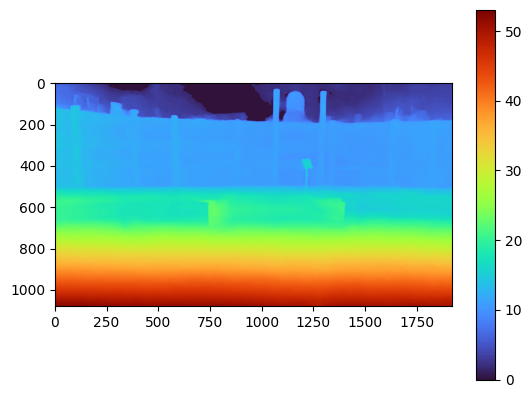

In [8]:
plt.imshow(dispCloseUp, cmap="turbo")
plt.colorbar()
plt.show()
cv2.destroyAllWindows() 

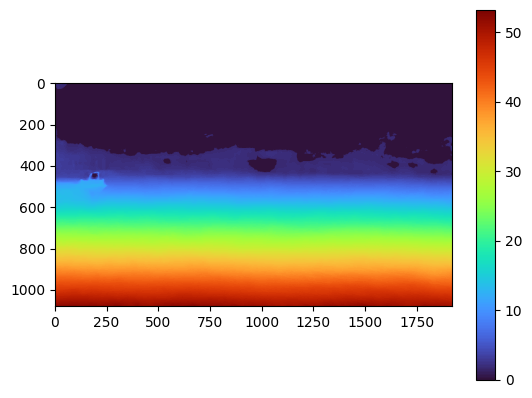

In [9]:
plt.imshow(disp_bro, cmap="turbo")
plt.colorbar()
plt.show()
cv2.destroyAllWindows() 

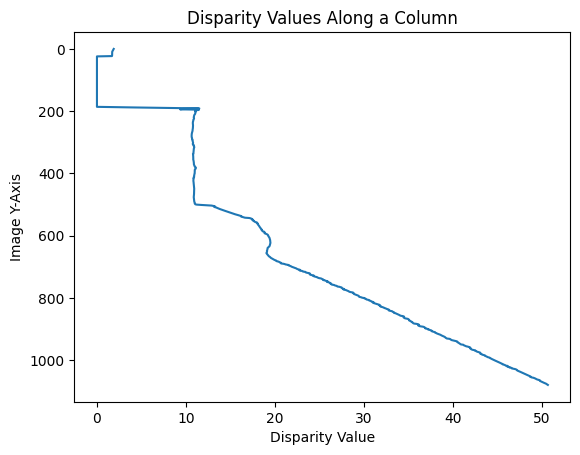

In [8]:
disparity_map = dispCloseUp

column_index = disparity_map.shape[1] // 2

column_data = disparity_map[:, column_index]

y_values = range(len(column_data))

plt.figure()
plt.plot(column_data, y_values)
plt.gca().invert_yaxis()  # Invert y-axis to match image orientation
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along a Column')
plt.show()

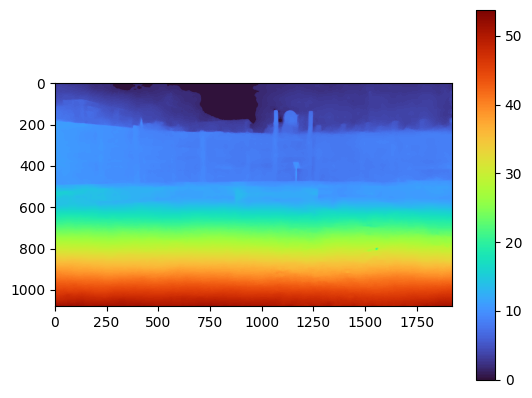

In [11]:
disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
plt.imshow(disp, cmap="turbo")
plt.colorbar()
plt.show()

##### Fetch image


In [9]:

def fetch_image(main_as_well=False, RES_FOLDER=RESULT_FOLDER, time=timestamp):
    K_seclude = np.loadtxt(f"{RES_FOLDER}/left/K_matrix.txt")
    R_seclude = np.loadtxt(f"{RES_FOLDER}/left/R_matrix.txt")
    T_seclude = np.loadtxt(f"{RES_FOLDER}/left/T_matrix.txt")

    plt.ion()
    new_main_image = cv2.imread(f"{RES_FOLDER}/left/{time}.png")
    new_disparity_image = np.array(cv2.imread(f"{RES_FOLDER}/disp_zed/{time}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
    if(main_as_well):
        return new_disparity_image, new_main_image
    return new_disparity_image

##### Interpolation of an image

In [10]:
def interpolate(dispMap, multiplier=2):
    new_width = dispMap.shape[1] * multiplier
    new_height = dispMap.shape[0] * multiplier
    new_dimensions = (new_width, new_height)
    return cv2.resize(dispMap, new_dimensions, interpolation=cv2.INTER_LINEAR)

def display_disp_image(to_be_displayed, title="Image", d_type="turbo"):
    plt.imshow(to_be_displayed, cmap=d_type)
    plt.title(title)
    plt.show()

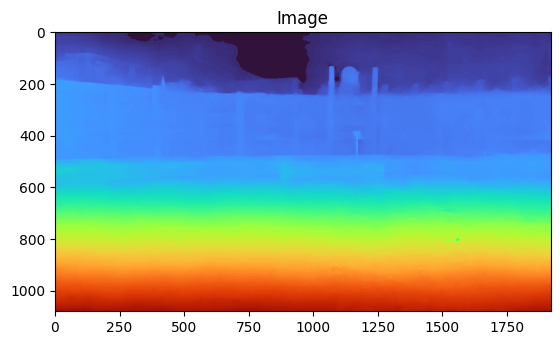

In [11]:
imgDisp, i = fetch_image(True)
display_disp_image(imgDisp)

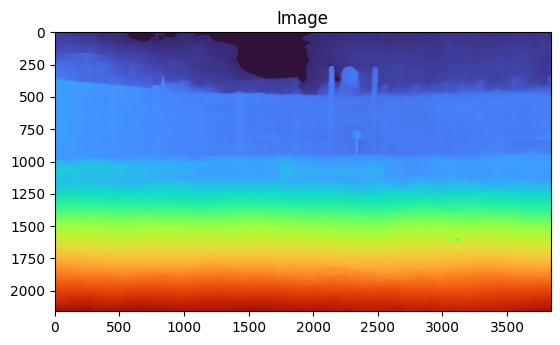

In [15]:
new_disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
new_disp = interpolate(new_disp)
display_disp_image(new_disp)

(3840, 2160)


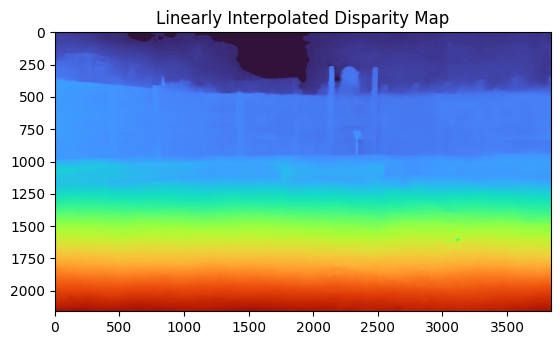

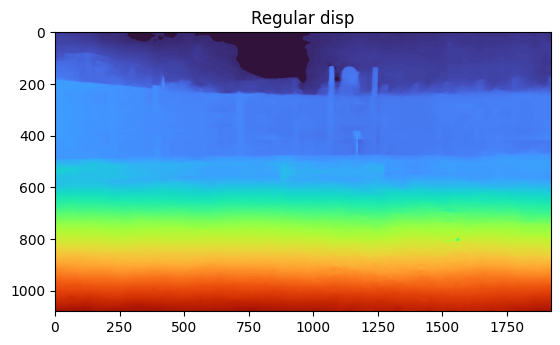

In [12]:

disparity_map = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
# Specify new dimensions (e.g., double the width and height)
new_width = disparity_map.shape[1] * 2
new_height = disparity_map.shape[0] * 2
new_dimensions = (new_width, new_height)
print(new_dimensions)

# Resize with linear interpolation
interpolated_image = cv2.resize(disparity_map, new_dimensions, interpolation=cv2.INTER_LINEAR)

# Save or display the new image
#cv2.imwrite('path/to/save/interpolated_image.png', interpolated_image)

# Optionally, display the image
plt.imshow(interpolated_image, cmap='turbo')
plt.title('Linearly Interpolated Disparity Map')
plt.show()
plt.imshow(disp, cmap='turbo')
plt.title('Regular disp')
plt.show()

##### Below is for plotting disparity as a graph down a single pixel column of an image using the disparity map, regular or interpolated. 

In [13]:
def disparity_graphing(disp_map, col_indices=[500], display=False, even_spaced_triple=False,  title="Disparity Values Along Column(s)"):
    
    plt.figure()
    # Extract and plot each column


    if(even_spaced_triple):
        col_indices = [disp_map.shape[1] // 4, disp_map.shape[1] // 2, 3 * disp_map.shape[1] // 4]
    else:
        for i, col in enumerate(col_indices):
            if(col > disp_map.shape[1]):
                col_indices.pop(i+1)

    for index, col_idx in enumerate(col_indices):
        col_data = disp_map[:, col_idx]
        y_values = range(len(col_data))
        plt.plot(col_data, y_values, label=f'Column {index + 1} (Index {col_idx})')

    # Invert y-axis to match image orientation
    plt.gca().invert_yaxis()

    # Add labels and legend
    plt.xlabel('Disparity Value')
    plt.ylabel('Image Y-Axis')
    plt.title(title)
    plt.legend()

    # Show the plot
    if(display):
        plt.show()

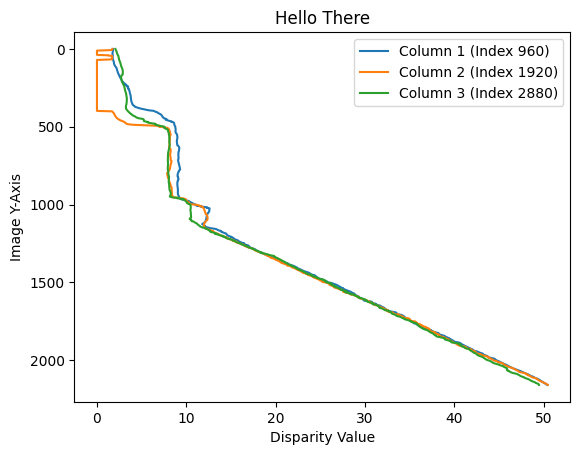

In [14]:
new_disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
disparity_graphing(interpolate(new_disp), [1000,2000, 3000, 100000000], True, True,"Hello There")


In [15]:
def display_columns_on_image(original_image, even_spaced_triple=False, col_indices=[500], title="Columns on original image"):
    colours = [(255,0,0), (0,255,0), (0,0,255)]
    height = original_image.shape[0]
    width = original_image.shape[1]

    if(even_spaced_triple): 
        col_indices = [original_image.shape[1] // 4, original_image.shape[1] // 2, 3 * original_image.shape[1] // 4]
    else:   
        for i, col in enumerate(col_indices):
            if(col > original_image.shape[1]):
                print("Cols popped")
                col_indices.pop(i+1)

    for index, col_idx in enumerate(col_indices):
        colour = colours[index%3]

        original_image = cv2.line(original_image, (col_indices[index],0), (col_indices[index], height), colour, 3)
        #original_image = cv2.line(original_image, dimStart, dimSlutt, colour, 1)


    display_disp_image(original_image)


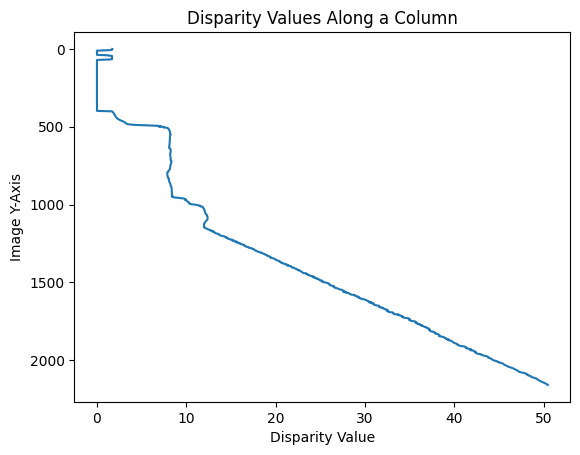

In [16]:
# Plot for the disparity value down a single column of a chosen image 

disparity_map = interpolated_image

column_index = disparity_map.shape[1] // 2

column_data = disparity_map[:, column_index]

y_values = range(len(column_data))

plt.figure()
plt.plot(column_data, y_values)
plt.gca().invert_yaxis()  # Invert y-axis to match image orientation
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along a Column')
plt.show()

Width and height: 1920 1080


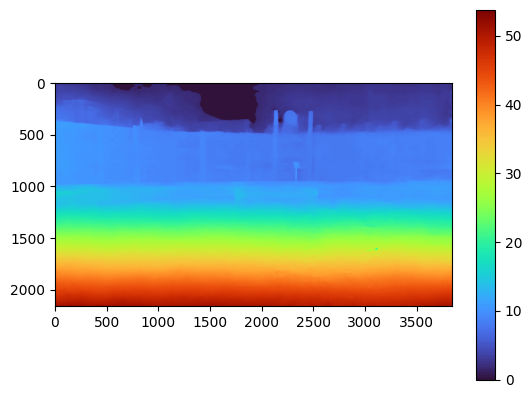

In [17]:
height = disp.shape[0]
width = disp.shape[1]

dims1 = (0, 500)
dims2 = (height, 500)

print("Width and height: " + str(width) + " " +str(height))


#Linje gjennom bildet
#dispImg = cv2.line(disp, dims1, dims2, (0, 255, 0), 1) 
plt.imshow(interpolated_image, cmap="turbo")
plt.colorbar()
plt.show()

[1000, 2000, 3000]


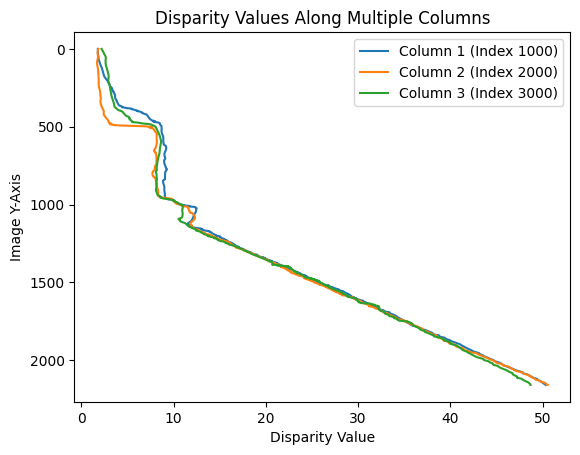

In [18]:

# Load the interpolated disparity map image
#loadImg = 
disparity_map = interpolated_image

# Choose three column indices
# Den øverste av de under er på kvarten, midten og 3 kvarten, mens den underste er bare satt til ett, to og tre tusen

#columns_indices = [disparity_map.shape[1] // 4, disparity_map.shape[1] // 2, 3 * disparity_map.shape[1] // 4]
columns_indices = [1000, 2000, 3000]
print(columns_indices)


# Create a figure for plotting
plt.figure()

# Extract and plot each column
for index, col_idx in enumerate(columns_indices):
    column_data = disparity_map[:, col_idx]
    y_values = range(len(column_data))

    plt.plot(column_data, y_values, label=f'Column {index + 1} (Index {col_idx})')

# Invert y-axis to match image orientation
plt.gca().invert_yaxis()

# Add labels and legend
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along Multiple Columns')
plt.legend()

# Show the plot
plt.show()


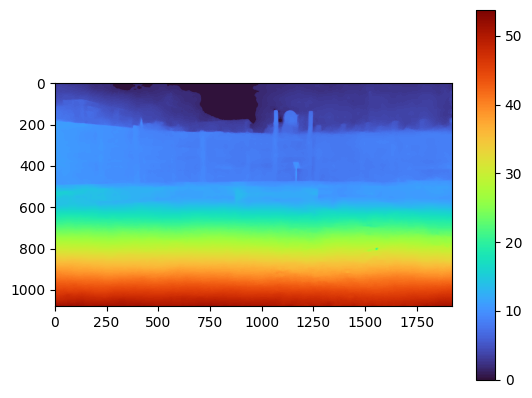

In [23]:
# LAGRING AV BILDER ELLER PLOTS

save_path = "./bilder/lagra_bilete/"
bilde_navn_disp = "disp_closeUp_første.png"
bilde_navn_venstre = "nærme_brygga.png"
mappe = BRYGGE_SEKVENS
index = timestamps[0]

K_lagre = np.loadtxt(f"{mappe}/left/K_matrix.txt")
R_lagre = np.loadtxt(f"{mappe}/left/R_matrix.txt")
T_lagre = np.loadtxt(f"{mappe}/left/T_matrix.txt")
plt.ion()


# Under åpner vi ti = n'te bildet
left_images_filenames_lagring = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{mappe}/left")))
timestamps = list(map(lambda fn: fn.split(".")[0], left_images_filenames_lagring))
left_lagre = cv2.imread(f"{mappe}/left/{index}.png")
right_lagre = cv2.imread(f"{mappe}/right/{index}.png")
dispLagring = np.array(cv2.imread(f"{mappe}/disp_zed/{index}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
plt.imshow(dispLagring, cmap="turbo")
plt.colorbar()
plt.show()

In [24]:

sant = False
if(sant):
    
    lagreBilde = os.path.join(save_path, bilde_navn_disp)
    plt.savefig(lagreBilde)

    
    image = img.open(f"{mappe}/left/{index}.png")
    lagreVenstre = os.path.join(save_path, bilde_navn_venstre)
    image.save(lagreVenstre)

    cv2.destroyAllWindows()

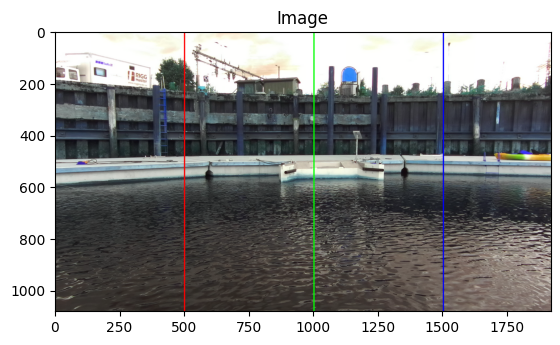

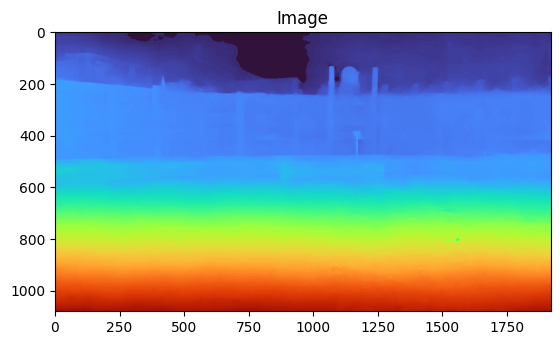

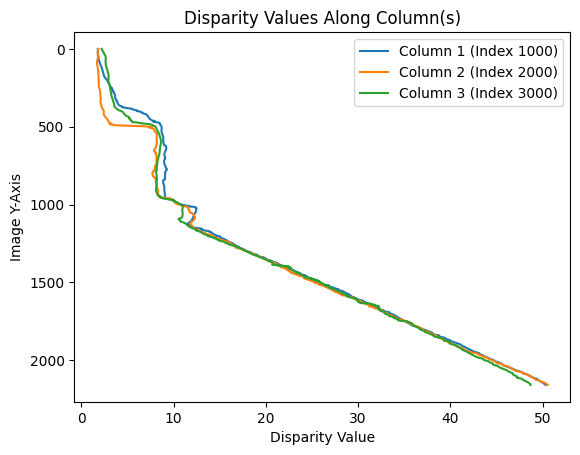

In [19]:
# Timestamps
# Første: 1689072599961543541  Nærme:  1689072633388130541 Bru:  1689068851836122093 Båt: 1689068854381001093
Første= 1689072599961543541  
Nærme=  1689072633388130541
Bru =  1689068851836122093
Båt =  1689068854381001093
 

# Fetch a new current working image and respective disparity
# Dette er disp_første og venstre_første
#current_working_disparity, current_working_image = fetch_image(True)

# Dette er disp_nærme_brygga og nærme_brygga
current_working_disparity, current_working_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
første_disparity, første_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
nærme_disparity, nærme_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS, time=Nærme)
bru_disparity, bru_image = fetch_image(True, RES_FOLDER=BRO_SEKVENS, time=Bru)

# Display the original image and columns
i1 = 500
i2 = 1000
i3 = 1500 
display_columns_on_image(current_working_image, col_indices=[i1, i2, i3])

# Display the disparity map
display_disp_image(current_working_disparity)

# Display the disparity graph
multi = 2
curr_disp = interpolate(current_working_disparity, multiplier=multi)
disparity_graphing(curr_disp, display=True, even_spaced_triple=False, col_indices=[i1*multi, i2*multi,i3*multi])


##### 1D interpolation

In [20]:
# Function to interpolate a single column
# Input is a processed disparity image
def interpolate_column(column):
    # Indices of valid and invalid elements
    valid_mask = np.isfinite(column)
    valid_indices = np.where(valid_mask)[0]
    invalid_indices = np.where(~valid_mask)[0]

    # Check if we have enough data for interpolation
    if len(valid_indices) == 0:
        # No valid data in this column
        return column
    elif len(invalid_indices) == 0:
        # No need for interpolation
        return column

    # Interpolate invalid data points
    valid_data = column[valid_mask]
    column[~valid_mask] = np.interp(invalid_indices, valid_indices, valid_data)
    return column

def interpolate_each_column(dI):
    # Applying the interpolation to each column
    height, width = dI.shape
    for x in range(width):
        dI[:, x] = interpolate_column(dI[:, x])

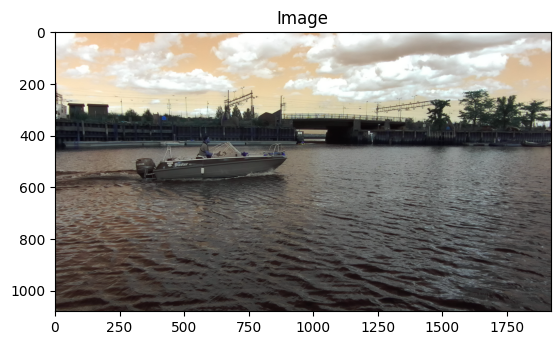

In [69]:
dI_første = current_working_disparity
dI_nærme = nærme_disparity
dI_bru = bru_disparity
dI = dI_bru

båt_test_disp, båt_test_bilde = fetch_image(True, RES_FOLDER=BRO_SEKVENS ,time=Båt)

#interpolate_each_column(dI)
#interpolate_each_column(dI_nærme)
#interpolate_each_column(dI_bru)


display_disp_image(båt_test_bilde)

interpolate_each_column(båt_test_disp)

In [76]:
""" 
n = 5  # Size of the kernel, as Vipul used in his thesis
kernerl_k = np.ones(n) / n  # Kernel for averaging

# Function to apply low-pass filter to a column
def low_pass_filter(column, K=kernerl_k):
    # Apply convolution
    filtered_column = np.convolve(column, K, mode='same')
    return filtered_column

# Input should be an interpolated disp image
def apply_low_pass_filter(dI):
    height, width = dI.shape
    df = np.zeros_like(dI)  # Low-pass filtered disparity image
    for x in range(width):
        df[:, x] = low_pass_filter(dI[:, x])

# Define the 1D Sobel kernel
kernel_m = np.array([-1, 0, 1])

# Input should be a low-pass filtered interpolated disp image
def sobel_convolving(df):
    # Initialize an array to store the vertical derivative image
    vertical_derivative = np.zeros_like(df)

    # Apply the Sobel kernel to each column
    for i in range(df.shape[1]):  # Iterate over columns
        vertical_derivative[:, i] = np.convolve(df[:, i], kernel_m, mode='same')

    return vertical_derivative

# Input should be a sobel_convolved, low-pass filtered, interpolated disp image
def differentiate_and_pad(df):
    # Computing the derivative of each column
    df_derivative = np.diff(df, axis=0)

    # Padding to handle size difference after np.diff
    df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge')

"""

" \nn = 5  # Size of the kernel, as Vipul used in his thesis\nkernerl_k = np.ones(n) / n  # Kernel for averaging\n\n# Function to apply low-pass filter to a column\ndef low_pass_filter(column, K=kernerl_k):\n    # Apply convolution\n    filtered_column = np.convolve(column, K, mode='same')\n    return filtered_column\n\n# Input should be an interpolated disp image\ndef apply_low_pass_filter(dI):\n    height, width = dI.shape\n    df = np.zeros_like(dI)  # Low-pass filtered disparity image\n    for x in range(width):\n        df[:, x] = low_pass_filter(dI[:, x])\n\n# Define the 1D Sobel kernel\nkernel_m = np.array([-1, 0, 1])\n\n# Input should be a low-pass filtered interpolated disp image\ndef sobel_convolving(df):\n    # Initialize an array to store the vertical derivative image\n    vertical_derivative = np.zeros_like(df)\n\n    # Apply the Sobel kernel to each column\n    for i in range(df.shape[1]):  # Iterate over columns\n        vertical_derivative[:, i] = np.convolve(df[:, i], 

##### The Cell below plots out the correct histograms


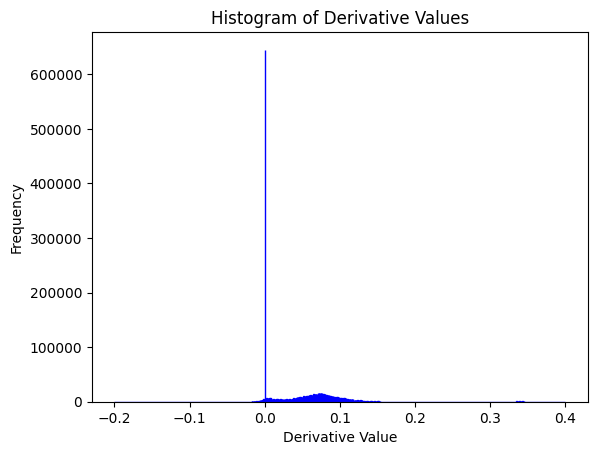

In [77]:
n = 5  # Size of the kernel, as Vipul used in his thesis
kernerl_k = np.ones(n) / n  # Kernel for averaging

# Function to apply low-pass filter to a column
def low_pass_filter(column, K=kernerl_k):
    # Apply convolution
    filtered_column = np.convolve(column, K, mode='same')
    return filtered_column

dI = båt_test_disp
#dI = dI_nærme

interpolate_each_column(dI)

# This is manually doing the above cell
# Apply the low-pass filter to each column
height, width = dI.shape
df = np.zeros_like(dI)  # Low-pass filtered disparity image
for x in range(width):
    df[:, x] = low_pass_filter(dI[:, x])

# Define the 1D Sobel kernelS
kernel_m = np.array([-1, 0, 1])

# Initialize an array to store the vertical derivative image
vertical_derivative = np.zeros_like(df)

# Apply the Sobel kernel to each column
for i in range(df.shape[1]):  # Iterate over columns
    vertical_derivative[:, i] = np.convolve(df[:, i], kernel_m, mode='same')

# df now contains the low-pass filtered disparity image
# Computing the derivative of each column
df_derivative = np.diff(df, axis=0)

# Padding to handle size difference after np.diff
df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge')
#første_df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge')

# Input should be a disparity image where each column is differentiated
def flatten_and_plot_histogram(df_derivative, plot=True, input_bins=2000):
    # Flatten the array of derivatives to a 1D array
    flattened_derivatives = df_derivative.flatten()

    if(plot):
        # Plot the histogram
        plt.figure()
        plt.hist(flattened_derivatives, bins=input_bins, range=(-0.2,0.4), color='blue', edgecolor='blue')
        plt.title('Histogram of Derivative Values')
        plt.xlabel('Derivative Value')
        plt.ylabel('Frequency')
        # Show the plot
        plt.show()
    
    return flattened_derivatives
    
flattened_derivatives = flatten_and_plot_histogram(df_derivative)

#### An Attempt at SKlearn

In [81]:
from sklearn.cluster import KMeans

def gaussian(x, mean, stddev):
    return (1 / (stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / stddev) ** 2)

# Gaussian fit function
def fit_gaussian(data):
    mean = np.mean(data)
    stddev = np.std(data)
    return mean, stddev

def clustering(flattened_derivatives, guess1=[0.0], guess2=[0.06], a_mini=-0.2, a_maxi=0.4, clusters=2):
    # Clipping the data to be between -0.2 and 0.4
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    initial_centers = np.array([guess1, guess2])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=clusters, init=initial_centers, n_init=1)
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, labels, centers

clustering_model, labels, centers = clustering(flattened_derivatives, guess1=[0.01], guess2=[0.06])

In [79]:

# Bro uten båt
#guess1, guess2 = [-0.01], [0.06]

# Bro med båt midt i bildet
guess1, guess2 = [0.01], [0.06]

# Clipping the data to be between -0.2 and 0.4
clipped_derivatives = np.clip(flattened_derivatives, a_min=-0.2, a_max=0.4)

# Reshape data for KMeans
clustering_model = clipped_derivatives.reshape(-1, 1)

# Initial guesses for cluster centers (approximated from histogram peaks)
initial_centers = np.array([guess1, guess2])  # replace peak1, peak2 with your estimates

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1)
kmeans.fit(clustering_model)

# Get the labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_


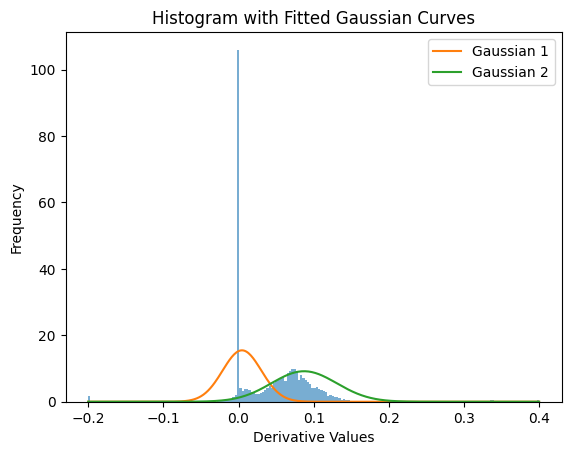

In [86]:
def curve_fitting(clustering_model, labels, plot=True, k=2):
    # Separate the data into two clusters
    cluster1 = clustering_model[labels == 0]
    cluster2 = clustering_model[labels == 1]

    # Fit Gaussian to each cluster
    mean1, stddev1 = fit_gaussian(cluster1)
    mean2, stddev2 = fit_gaussian(cluster2)

    # Calculate range limits for each Gaussian curve
    dL1 = mean1 - k * stddev1
    dU1 = mean1 + k * stddev1
    dL2 = mean2 - k * stddev2
    dU2 = mean2 + k * stddev2

    if(plot):
        # Create a range of x values
        x_values = np.linspace(-0.2, 0.4, 400)

        # Gaussian curves
        gaussian_curve1 = gaussian(x_values, mean1, stddev1)
        gaussian_curve2 = gaussian(x_values, mean2, stddev2)

        # Plot histogram and Gaussian curves
        plt.figure()
        plt.hist(clipped_derivatives, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
        plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
        plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
        plt.xlabel('Derivative Values')
        plt.ylabel('Frequency')
        plt.title('Histogram with Fitted Gaussian Curves')
        plt.legend()
        plt.show()
        
    return dL1, dU1, dL2, dU2



# Separate the data into two clusters
cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]

# Fit Gaussian to each cluster
mean1, stddev1 = fit_gaussian(cluster1)
mean2, stddev2 = fit_gaussian(cluster2)

# Below are the upper and lower bounds
# Assuming you have mean1, stddev1, mean2, stddev2 from the Gaussian fits
k = 1.5 # Adjust this constant as needed

# Calculate range limits for each Gaussian curve
dL1 = mean1 - k * stddev1
dU1 = mean1 + k * stddev1
dL2 = mean2 - k * stddev2
dU2 = mean2 + k * stddev2

# Create a range of x values
x_values = np.linspace(-0.2, 0.4, 400)

# Gaussian curves
gaussian_curve1 = gaussian(x_values, mean1, stddev1)
gaussian_curve2 = gaussian(x_values, mean2, stddev2)

# Plot histogram and Gaussian curves
plt.figure()
plt.hist(clipped_derivatives, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

#### Assigning each pixel to one of the two curves.

In [83]:

def pixel_classification(df_derivative, dL1, dU1, dL2, dU2):
    # And dL1, dU1, dL2, dU2 are the range limits for the two Gaussians
    classification_map = np.empty(df_derivative.shape, dtype=object)

    for i in range(df_derivative.shape[0]):  # Rows
        for j in range(df_derivative.shape[1]):  # Columns
            derivative_value = df_derivative[i, j]

            # Check if the derivative value falls into the range of either Gaussian
            if dL1 <= derivative_value <= dU1:
                classification = 'upright'
            elif dL2 <= derivative_value <= dU2:
                classification = 'horizontal'
            else:
                classification = 'unknown'

            classification_map[i, j] = classification

    return classification_map

# And dL1, dU1, dL2, dU2 are the range limits for the two Gaussians
classification_map = np.empty(df_derivative.shape, dtype=object)

for i in range(df_derivative.shape[0]):  # Rows
    for j in range(df_derivative.shape[1]):  # Columns
        derivative_value = df_derivative[i, j]

        # Check if the derivative value falls into the range of either Gaussian
        if dL1 <= derivative_value <= dU1:
            classification = 'upright'
        elif dL2 <= derivative_value <= dU2:
            classification = 'horizontal'
        else:
            classification = 'unknown'

        classification_map[i, j] = classification


#### Displaying the upright and horizontal surfaces

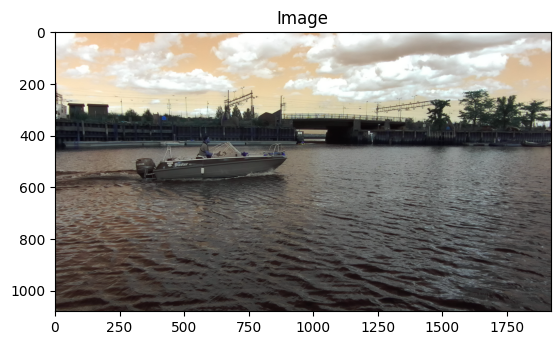

In [89]:
# Define colors for each classification
colors = {
    'upright': [1, 0, 0],  # Red
    #'horizontal': [0, 0, 1],  # Blue
    'horizontal': [0, 1, 0],  # Green
    'unknown': [0.5, 0.5, 0.5]  # Gray
}

def assign_colours_and_plot(classification_map, colors=colors, plot=True, title="Pixel-wise Disparity Map Classification"):
    # Create an empty array for the color-coded image
    color_coded_image = np.zeros((*classification_map.shape, 3))

    # Assign colors
    for classification, color in colors.items():
        mask = classification_map == classification
        color_coded_image[mask] = color

    if(plot):
        plt.figure(figsize=(10, 6))
        plt.imshow(color_coded_image)
        plt.title(title)
        plt.axis('off')  # Hide the axes
        plt.show()

display_disp_image(båt_test_bilde)

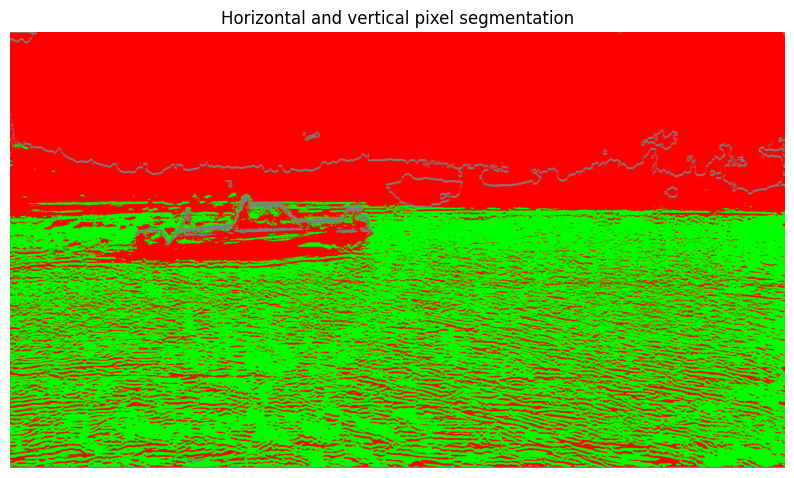

In [90]:

assign_colours_and_plot(classification_map, title="Horizontal and vertical pixel segmentation")

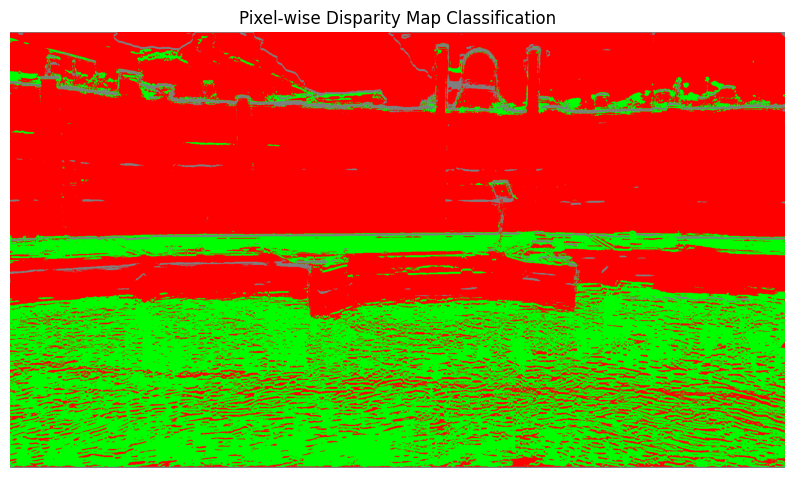

In [38]:
# Define colors for each classification
colors = {
    'upright': [1, 0, 0],  # Red
    #'horizontal': [0, 0, 1],  # Blue
    'horizontal': [0, 1, 0],  # Green
    'unknown': [0.5, 0.5, 0.5]  # Gray
}

def assign_colours_and_plot(classification_map, colors=colors, plot=True):
    # Create an empty array for the color-coded image
    color_coded_image = np.zeros((*classification_map.shape, 3))

    # Assign colors
    for classification, color in colors.items():
        mask = classification_map == classification
        color_coded_image[mask] = color

    if(plot):
        plt.figure(figsize=(10, 6))
        plt.imshow(color_coded_image)
        plt.title('Pixel-wise Disparity Map Classification')
        plt.axis('off')  # Hide the axes
        plt.show()

assign_colours_and_plot(classification_map)

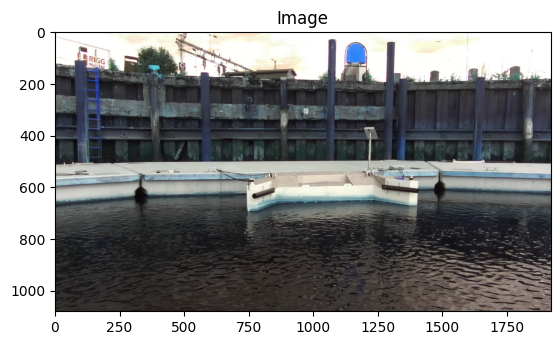

In [91]:
display_disp_image(nærme_image)

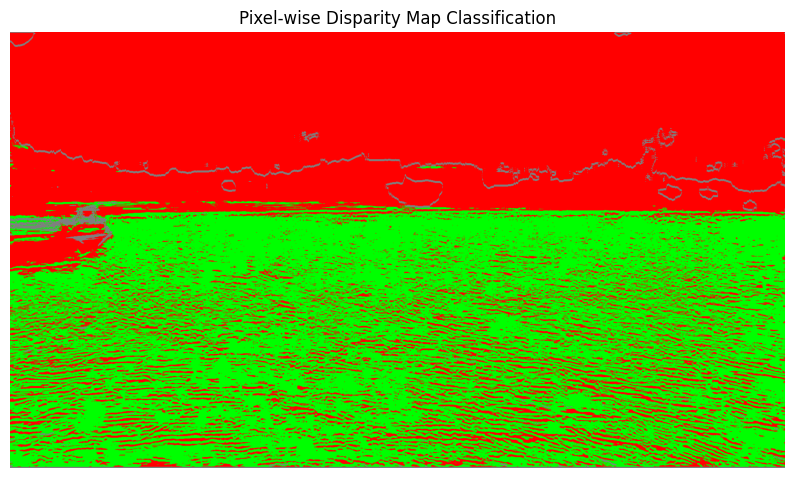

In [47]:
# Define colors for each classification
colors = {
    'upright': [1, 0, 0],  # Red
    #'horizontal': [0, 0, 1],  # Blue
    'horizontal': [0, 1, 0],  # Green
    'unknown': [0.5, 0.5, 0.5]  # Gray
}

def assign_colours_and_plot(classification_map, colors=colors, plot=True):
    # Create an empty array for the color-coded image
    color_coded_image = np.zeros((*classification_map.shape, 3))

    # Assign colors
    for classification, color in colors.items():
        mask = classification_map == classification
        color_coded_image[mask] = color

    if(plot):
        plt.figure(figsize=(10, 6))
        plt.imshow(color_coded_image)
        plt.title('Pixel-wise Disparity Map Classification')
        plt.axis('off')  # Hide the axes
        plt.show()

assign_colours_and_plot(classification_map)

In [ ]:
current_working_disparity, current_working_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
nærme_disparity, nærme_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS, time=Nærme)
bru_disparity, bru_image = fetch_image(True, RES_FOLDER=BRO_SEKVENS, time=Bru)
båt_disparity, båt_imgae = fetch_image(True,RES_FOLDER=BRO_SEKVENS, time=Båt)

def full_display(current_working_disparity, current_working_image):
    # Display the original image and columns
    i1 = 500
    i2 = 1000
    i3 = 1500 
    display_columns_on_image(current_working_image, col_indices=[i1, i2, i3])

    # Display the disparity map
    display_disp_image(current_working_disparity)

    # Display the disparity graph
    multi = 2
    curr_disp = interpolate(current_working_disparity, multiplier=multi)
    disparity_graphing(curr_disp, display=True, even_spaced_triple=False, col_indices=[i1*multi, i2*multi,i3*multi])


# Defekt as of now
def perform_everything(disparity_img, plot=False, g1=[0.0], g2=[0.7], convolve=False):
    
    interpolate_each_column(disparity_img)
    apply_low_pass_filter(disparity_img)
    disparity_img = sobel_convolving(disparity_img)
    differentiate_and_pad(disparity_img)

    flattened_derivatives = flatten_and_plot_histogram(disparity_img, plot=plot)

    clustering_model, labels, centers = clustering(flattened_derivatives, guess1=g1, guess2=g2)

    dL1, dU1, dL2, dU2 = curve_fitting(clustering_model, labels, plot=plot)

    classification_map = pixel_classification(disparity_img, dL1, dU1, dL2, dU2)

    assign_colours_and_plot(classification_map, plot=plot)

In [ ]:
full_display(nærme_disparity, nærme_image)

In [ ]:
full_display(nærme_disparity, nærme_image)
perform_everything(nærme_disparity, plot=True)

In [ ]:
disparity_img= bru_disparity
plot = True
g1 = [0.1]
g2 = [0.04]

interpolate_each_column(disparity_img)
apply_low_pass_filter(disparity_img)
differentiate_and_pad(disparity_img)


flattened_derivatives = flatten_and_plot_histogram(disparity_img, plot=plot, input_bins=200)


In [ ]:

clustering_model, labels, centers = clustering(flattened_derivatives, guess1=g1, guess2=g2)

dL1, dU1, dL2, dU2 = curve_fitting(clustering_model, labels, plot=plot)

classification_map = pixel_classification(disparity_img, dL1, dU1, dL2, dU2)

assign_colours_and_plot(classification_map, plot=plot)